# Pass clustering for Tableau Dashboard

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.3 MB/s eta 0:00:00


In [ ]:
#Imports
import xml.etree.ElementTree as et
import pandas as pd
import numpy as np
from IPython.core import display as ICD
from pandas import json_normalize
import tqdm as tqdm
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from datetime import datetime
import time
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import mplsoccer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Ignore warning (do not display them)
original_warning_settings = warnings.simplefilter("ignore")

In [ ]:
# Accessory functions and dataframes to be used

#@title

def parsef24(F24file):
   global match_events
   match_events = pd.DataFrame()
# not mine

def explode_event(nome_df,id_evento,mytresh):
   global exploded_df
   exploded_df = pd.DataFrame()
   return exploded_df
# not mine 
    

# These accessory functions are not here since they were given to me, so it is not my code to share.

#### Pass Clustering: How does FC Porto pass into the final third?


In [ ]:
# define location of file with all the matches
folder_path = "....."

#create df that will agreggate the information from all matches
all_passes_into_last_third = pd.DataFrame()

# iterate over each file
for file in tqdm.tqdm(os.listdir(folder_path)):

    # READ AND PREPARE DATA

    file_path = folder_path + "/" + file

    # read xml into a df called match_events
    parsef24(file_path)

    # start by adding team_name column to matches_event since our metric is per team and we will need to filter it based on team name more than once
    match_events['team_name'] = np.where(match_events['team_id'] == match_events['home_team_id'], match_events['home_team_name'], match_events['away_team_name'])


    if match_events["team_name"].str.contains("FC Porto").any():

      explode_event(match_events, 1, 0.15)
      columns_to_keep = ["matchday", "team_name", "home_team_name", "away_team_name", "player_id", "outcome", "x",  "y", "Pass End X", "Pass End Y", "keypass", "assist", "Angle", "Length", "Zone"]

      if "assist" not in exploded_df.columns: # when there are no games
        exploded_df["assist"] = len(exploded_df)*["-"]

      exploded_df = exploded_df[columns_to_keep]


      # we want passes that start before the final third and finish in the final third
      exploded_df[["Pass End Y","Pass End X"]] = exploded_df[["Pass End Y","Pass End X"]].astype(float)
      pass_into_final_third = exploded_df[(exploded_df["team_name"] == "FC Porto") & (exploded_df["x"] < 66) & (exploded_df["Pass End X"] >= 66)]

      # concat into the df with all passes
      all_passes_into_last_third = pd.concat((all_passes_into_last_third, pass_into_final_third), axis=0)


100%|██████████| 300/300 [36:37<00:00,  7.33s/it]


In [ ]:
# Create column with index to identify each pass/row
all_passes_into_last_third["id"] = all_passes_into_last_third.index

#  order columns of dataframe
all_passes_into_last_third = all_passes_into_last_third[["id", "matchday", "home_team_name", "away_team_name", "player_id", "outcome", "x",	"y",	"Pass End X", "Pass End Y", "keypass",	"assist", "Angle",	"Length",	"Zone"]]

# filter successful passes
success_passes_into_final_third = all_passes_into_last_third[(all_passes_into_last_third["outcome"] == 1)]
success_passes_into_final_third.head(100)

,id,matchday,home_team_name,away_team_name,player_id,outcome,x,y,Pass End X,Pass End Y,keypass,assist,Angle,Length,Zone
0,0,1,FC Porto,Sporting Braga,204152,1,59.3,30.1,77.1,3.7,-,-,5.5,25.9,Right
1,1,1,FC Porto,Sporting Braga,87668,1,57.0,85.4,69.2,93.9,-,-,0.4,14.1,Left
2,2,1,FC Porto,Sporting Braga,154312,1,51.3,23.7,66.2,2.2,-,-,5.5,21.4,Right
3,3,1,FC Porto,Sporting Braga,154312,1,64.8,5.8,74.1,33.4,-,-,1.1,21.2,Center
4,4,1,FC Porto,Sporting Braga,152590,1,64.8,93.3,76.3,95.1,-,-,0.1,12.1,Left
5,5,1,FC Porto,Sporting Braga,154312,1,34.3,6.2,79.2,30.6,1,-,0.3,50.0,Center
6,6,1,FC Porto,Sporting Braga,152590,0,33.4,96.9,74.8,82.1,-,-,6.1,44.6,Left
7,7,1,FC Porto,Sporting Braga,96432,0,57.8,20.3,85.2,47.5,-,-,0.6,34.2,Center
8,8,1,FC Porto,Sporting Braga,152590,0,43.8,95.9,70.9,53.6,-,-,5.5,40.5,Center
9,9,1,FC Porto,Sporting Braga,87668,1,57.6,41.8,70.2,59.9,-,-,0.7,18.1,Center


### K-Means para Pass Clustering

### Select features


In [ ]:
# Filter features of interest
# passes_features = all_passes_into_last_third[["x", "y", "Pass End X", "Pass End Y", "Angle", "Length", "Zone"]]
passes_features = success_passes_into_final_third[["x", "y", "Pass End X", "Pass End Y", "Angle", "Length"]]
passes_features.head(20)

,x,y,Pass End X,Pass End Y,Angle,Length
0,59.3,30.1,77.1,3.7,5.5,25.9
1,57.0,85.4,69.2,93.9,0.4,14.1
2,51.3,23.7,66.2,2.2,5.5,21.4
3,64.8,5.8,74.1,33.4,1.1,21.2
4,64.8,93.3,76.3,95.1,0.1,12.1
5,34.3,6.2,79.2,30.6,0.3,50.0
9,57.6,41.8,70.2,59.9,0.7,18.1
12,62.8,96.3,81.1,95.3,6.2,19.2
15,61.8,13.5,73.8,24.9,0.6,14.8
16,63.7,33.3,71.4,34.2,0.1,8.1


Hot encoding to use categorical variable: commented because in the end it was not used

In [ ]:
# # one hot enconding Zone
# encoder = OneHotEncoder(handle_unknown='ignore')
# encoded = encoder.fit_transform(passes_features[['Zone']]).toarray()

# # Get category names
# category_names = encoder.get_feature_names_out(['Zone'])

# # Add the one hot encoded columns to passes_features
# passes_features[category_names] = encoded
# passes_features.drop(["Zone"], axis = 1, inplace=True)
# passes_features.head(10)

In [ ]:
# Check that now there are no columns with nulls
passes_features.columns[passes_features.isnull().any()].tolist()

[]

<Axes: >

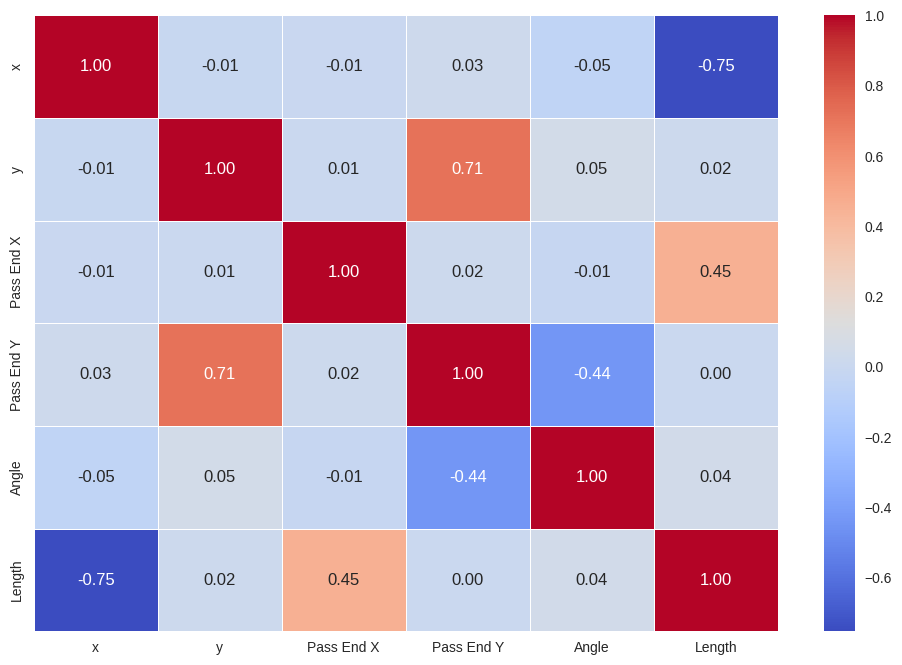

In [ ]:
# Check correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(passes_features.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

### Feature Scalling


In [ ]:
# Scale using MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(passes_features)
passes_features_scaled = pd.DataFrame(scaled, columns=passes_features.columns)

passes_features_scaled.head(20)

,x,y,Pass End X,Pass End Y,Angle,Length
0,0.896389,0.301,0.332335,0.024641,0.873016,0.316062
1,0.860283,0.854,0.095808,0.950719,0.063492,0.163212
2,0.770801,0.237,0.005988,0.009240,0.873016,0.257772
3,0.982732,0.058,0.242515,0.329569,0.174603,0.255181
4,0.982732,0.933,0.308383,0.963039,0.015873,0.137306
5,0.503925,0.062,0.395210,0.300821,0.047619,0.628238
6,0.869702,0.418,0.125749,0.601643,0.111111,0.215026
7,0.951334,0.963,0.452096,0.965092,0.984127,0.229275
8,0.935636,0.135,0.233533,0.242300,0.095238,0.172280
9,0.965463,0.333,0.161677,0.337782,0.015873,0.085492


### PCA: choosing the nr of PCs to use

In [ ]:
# get the explained variance of the 4 most relevant principal components.
pca = PCA(n_components=4)
pca.fit(passes_features_scaled)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.46977105, 0.27645675, 0.13887534, 0.07536627])

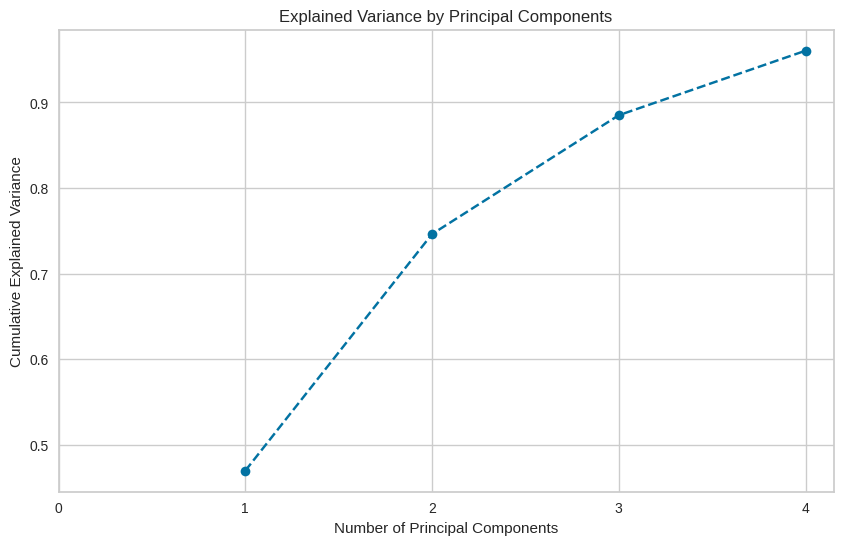

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xticks(range(0, len(explained_variance)+1, 1))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [ ]:
weights = pca.components_
weights

# Access the principal components and their loadings
principal_components = pca.components_
explained_variances = pca.explained_variance_ratio_

# Create a DataFrame to associate loadings with feature names
loadings_df = pd.DataFrame(principal_components, columns=passes_features_scaled.columns)

# Print the loadings (weights) for the first principal component
print("Loadings for each Principal Component:")
loadings_df


Loadings for each Principal Component:


,x,y,Pass End X,Pass End Y,Angle,Length
0,0.018780,0.320820,0.007726,0.686623,-0.651979,-0.011630
1,-0.031575,0.614995,0.005495,0.372326,0.693161,0.040678
2,-0.503638,-0.029595,0.468963,-0.004059,-0.040698,0.723792
3,-0.557456,-0.002597,-0.817811,0.002946,-0.026428,0.140409


In [ ]:
# MOST RELEVANT FEATURES

# Find the three most relevant features for our PCs
top_features_pcs = loadings_df.iloc[0:3]

for index,feature in top_features_pcs.iterrows():
    top_3_features = feature.abs().nlargest(3)
    print(index)
    print(f'Most relevant features for PC{index+1}:\n ', top_3_features)
    print('\n')

0
Most relevant features for PC1:
  Pass End Y    0.686623
Angle         0.651979
y             0.320820
Name: 0, dtype: float64


1
Most relevant features for PC2:
  Angle         0.693161
y             0.614995
Pass End Y    0.372326
Name: 1, dtype: float64


2
Most relevant features for PC3:
  Length        0.723792
x             0.503638
Pass End X    0.468963
Name: 2, dtype: float64




In [ ]:
# PCA with 3 PCs
# with 3PCs we can explain more than 80% of the variance
pca = PCA(n_components=3)
reduced = pd.DataFrame(pca.fit_transform(passes_features_scaled), columns=[f'PC{i}' for i in range(1, 4)])

reduced.head(10)

,PC1,PC2,PC3
0,-0.615378,-0.006379,0.038454
1,0.724966,0.111008,-0.152094
2,-0.650687,-0.051672,-0.091573
3,-0.026981,-0.532099,-0.056841
4,0.794060,0.127420,-0.133275
5,0.025204,-0.597231,0.531094
6,0.314164,-0.252117,-0.092912
7,0.173265,0.823313,-0.023802
8,-0.010444,-0.574185,-0.096032
9,0.171398,-0.476745,-0.210586


### KMeans: Decide nr of clusters

**Elbow Method**

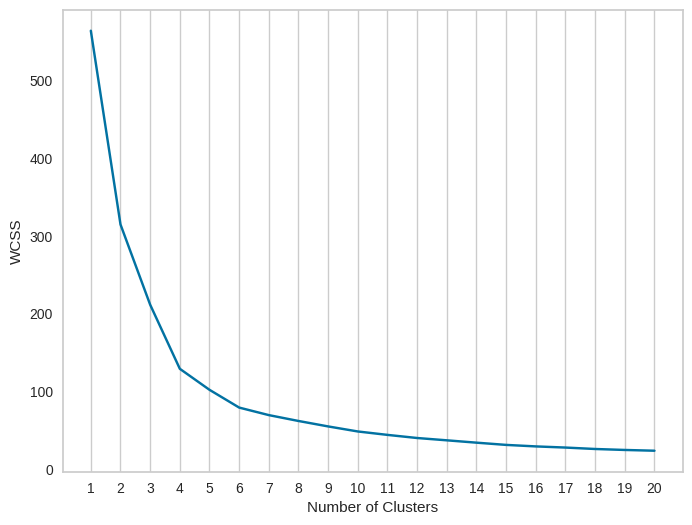

In [ ]:
# Test for a varying number of clusters (use 1 to 6 clusters)

# Compute Within Cluster Sum of Squares
within_ss = []

for nr_clusters in range(1, 21):
    kmeans = KMeans(n_clusters = nr_clusters)
    kmeans.fit(reduced)
    within_ss.append(kmeans.inertia_)


# Plot Within SS vs Number of Clusters
_, axes = plt.subplots(1, 1, figsize=(8,6))
plt.plot(range(1, 21), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 21))
plt.grid(which='major', axis='y')
plt.show()

SOme doubts between using k=4 or k=6 

 **Silhouette Method**:

Number of clusters: 2, Silhouette Score: 0.44727657228342466
Number of clusters: 3, Silhouette Score: 0.4532369750119876
Number of clusters: 4, Silhouette Score: 0.5297184103689165
Number of clusters: 5, Silhouette Score: 0.5178397838925561
Number of clusters: 6, Silhouette Score: 0.5006185537828707


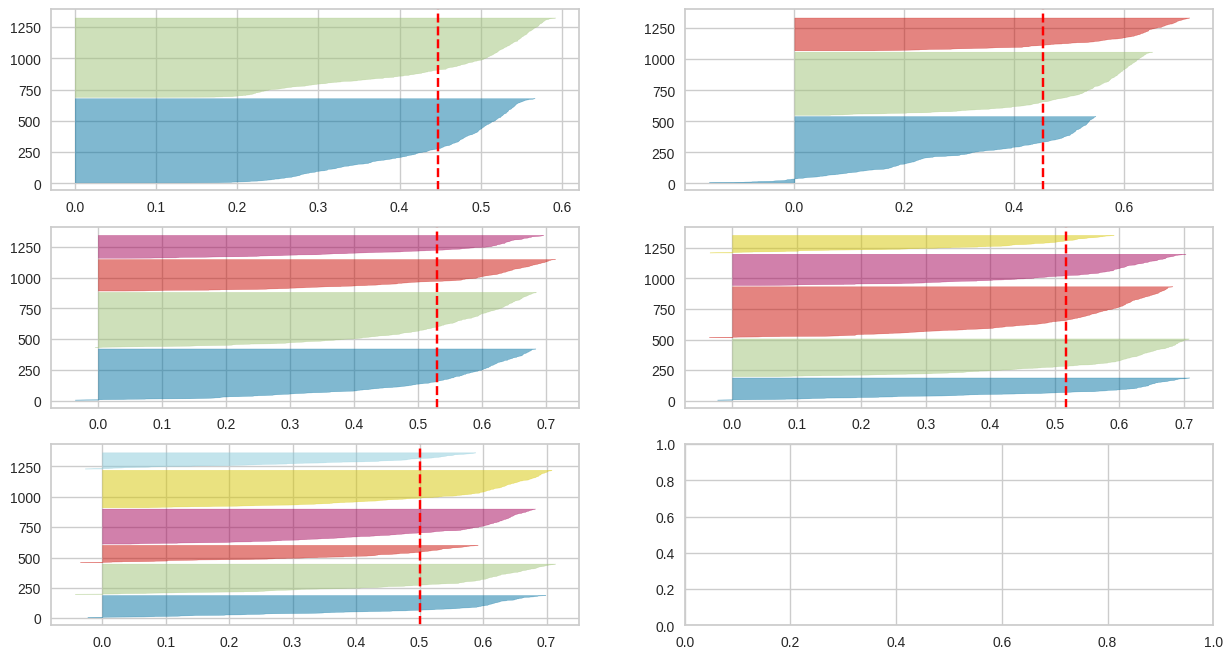

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15, 8))

for i in [2, 3, 4, 5, 6]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][mod])
    visualizer.fit(reduced)

    # Access silhouette score
    silhouette_score = visualizer.silhouette_score_

    # Print the silhouette score
    print(f'Number of clusters: {i}, Silhouette Score: {silhouette_score}')

plt.show()


Rules to choose k:
- Look for the higher values of silhouete score. However, that is not enough to choose a k.
- For a particular k, all the clusters should have a Silhouette score greater than the average score of the data set represented by the red-dotted line. The x-axis represents the Silhouette score.

- There shouldn’t be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points, if we have a cluster that is really wide, this means that probably that cluster can be divided in more than one, since it is comprising a lot of data in it that is maybe different.

Decision: 
- k= 6 since it appears to have a performance closer to k=4 and it allows a more fine clustering.

#### K-Means

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans = kmeans.fit(reduced)

# Add the cluster labels to the reduced DataFrame
labels = kmeans.predict(reduced)
reduced['cluster'] = kmeans.labels_


reduced.cluster.value_counts()

cluster
4    309
3    289
1    249
0    182
2    144
5    134
Name: count, dtype: int64

### CLuster visualization

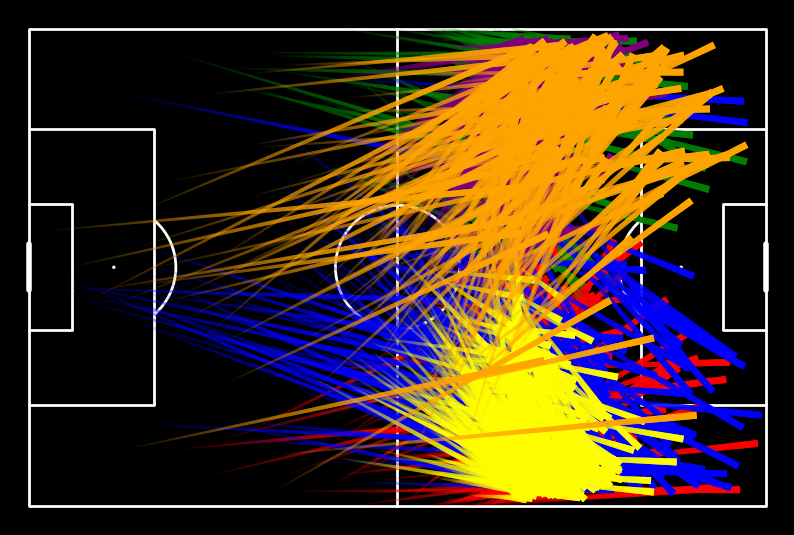

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = mplsoccer.Pitch(pitch_type="opta", pitch_color="black", line_color="white")
pitch.draw(ax=ax)

passes_features["cluster"] = kmeans.labels_
colors = ["green", "red", "blue", "purple", "yellow", "orange"]

for cluster in range(0,6):
  passes_features_cluster = passes_features[passes_features["cluster"]==cluster]
  pitch.lines(passes_features_cluster['x'], passes_features_cluster['y'],
                  passes_features_cluster['Pass End X'], passes_features_cluster['Pass End Y'],
                  lw=5, transparent=True, comet=True,
                  color=colors[cluster], ax=ax)

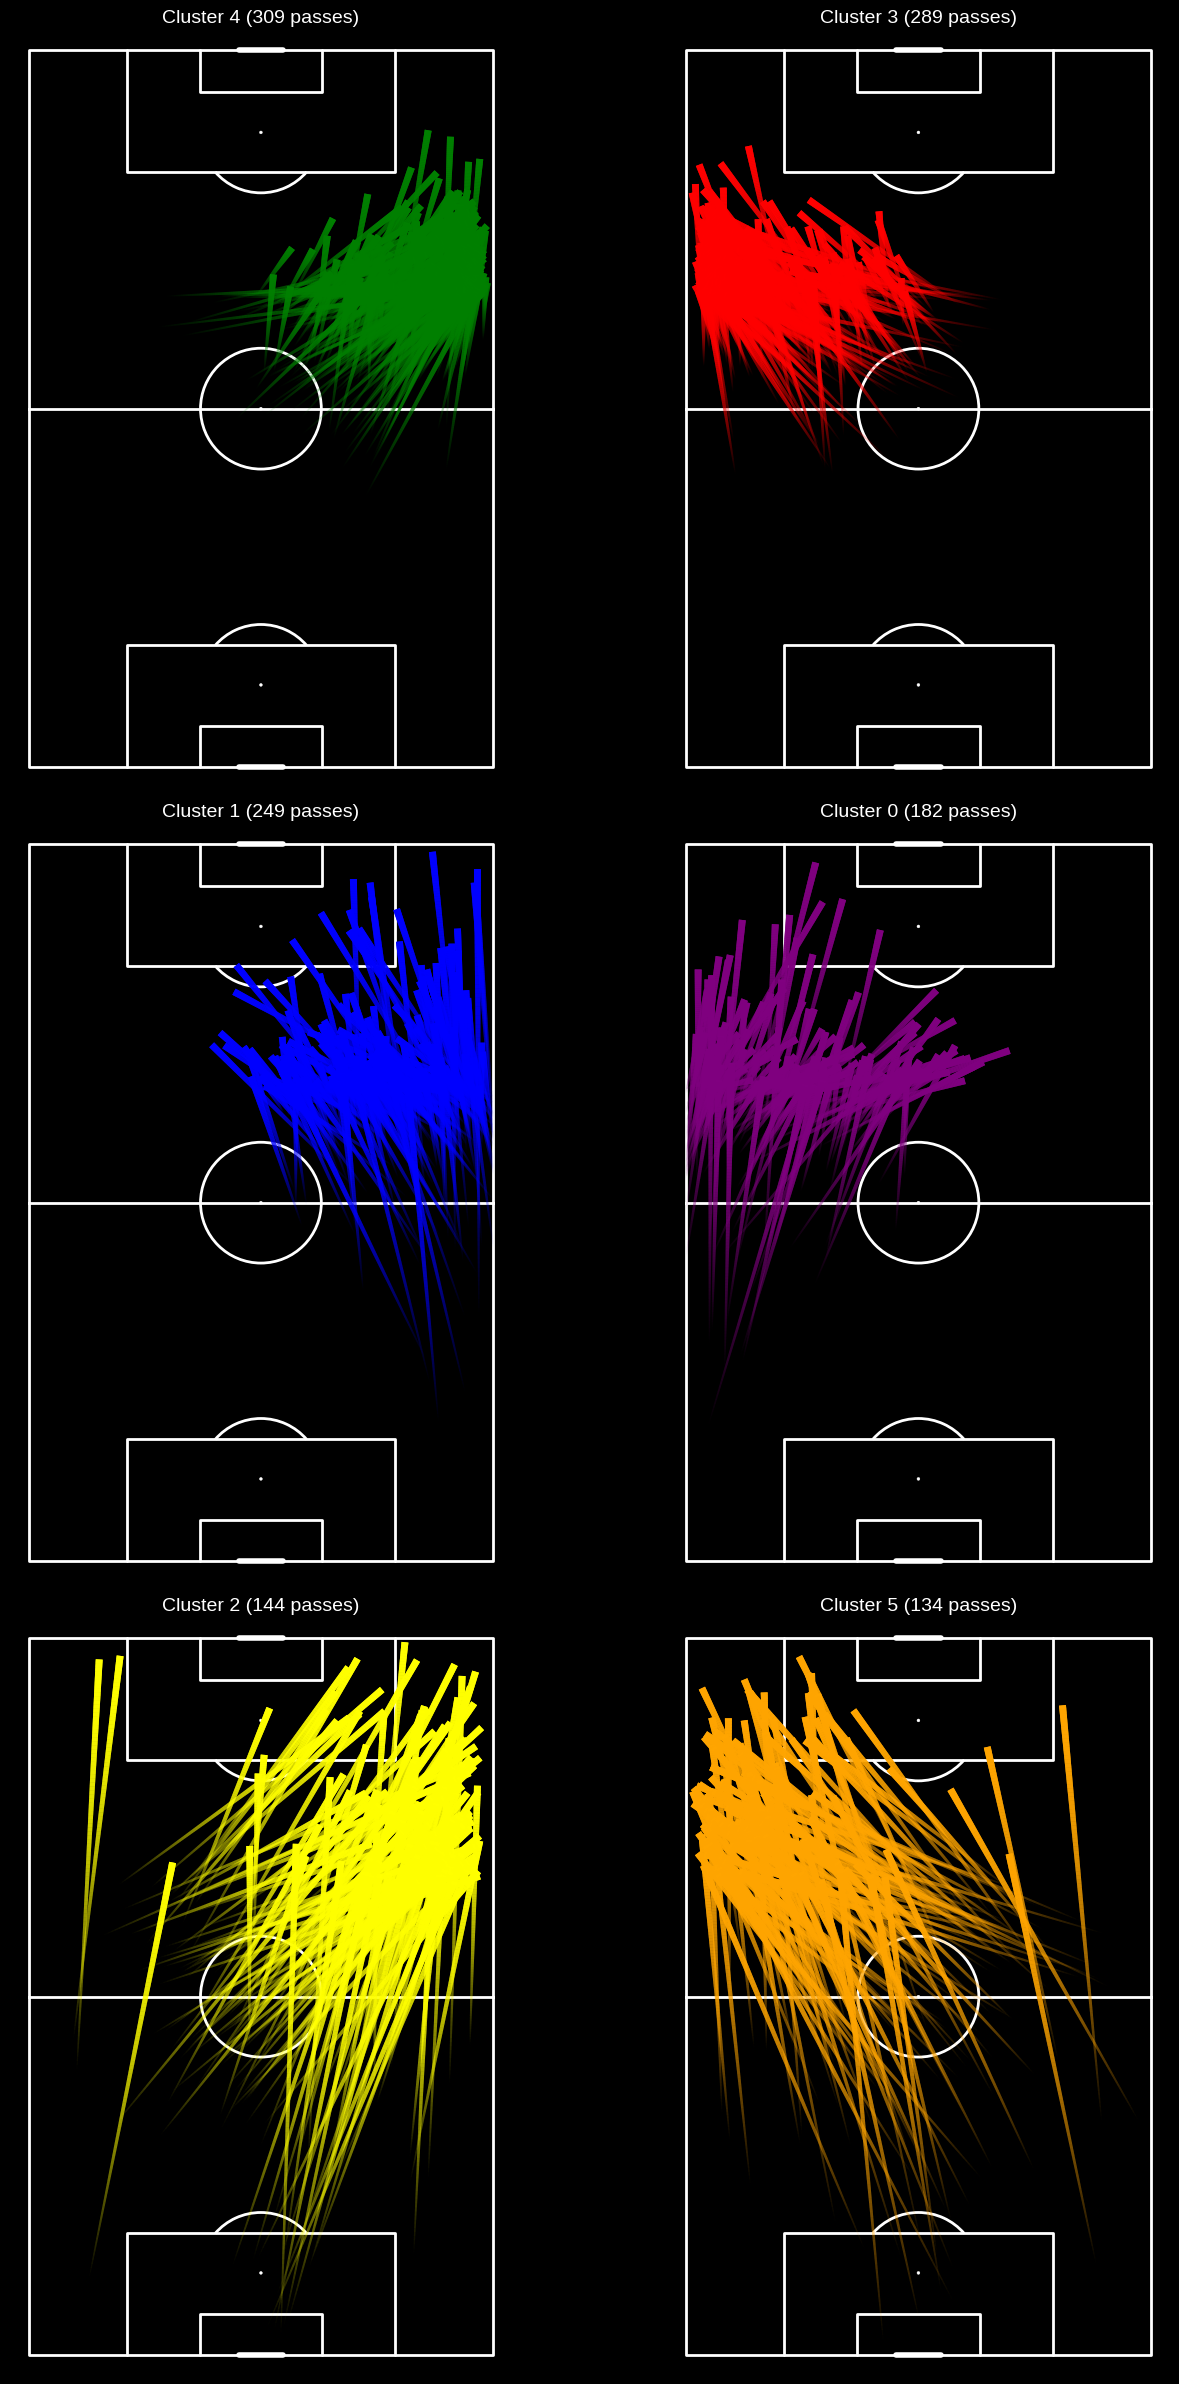

In [ ]:
import matplotlib.pyplot as plt
import mplsoccer

# Count the number of passes in each cluster and sort by nr of passes per cluster
passes_per_cluster = passes_features.groupby('cluster').size().sort_values(ascending=False)

# Create subplots with multiple plots per row
num_clusters = 6
num_cols = 2
num_rows = (num_clusters + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8*num_rows))
fig.set_facecolor('black')

colors = ["green", "red", "blue", "purple", "yellow", "orange"]

for i, (cluster, passes) in enumerate(passes_per_cluster.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.set_facecolor('black')

    passes_features_cluster = passes_features[passes_features["cluster"] == cluster]

    pitch = mplsoccer.VerticalPitch(pitch_type="opta", pitch_color="black", line_color="white")
    pitch.draw(ax=ax)

    pitch.lines(ax=ax, xstart=passes_features_cluster['x'], ystart=passes_features_cluster['y'],
                xend=passes_features_cluster['Pass End X'], yend=passes_features_cluster['Pass End Y'],
                lw=5, transparent=True, comet=True,
                color=colors[i])

    ax.set_title(f"Cluster {cluster} ({passes} passes)", color="white", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


### Preparation of final data to use in Tableau

In [ ]:
# create match column, identifying the home and away team
all_passes_into_last_third["match"] = all_passes_into_last_third["home_team_name"] + " vs· " + all_passes_into_last_third["away_team_name"]

# add cluster column to success_passes_into_final_third df
success_passes_into_final_third["cluster"] = passes_features["cluster"]

# merge both dfs by id to have the cluster for each pass
all_passes_into_last_third = pd.merge(all_passes_into_last_third, success_passes_into_final_third[["id", "cluster"]], on="id", how = "outer")

#fill with none the cluster value for failed passes (not clustered)
all_passes_into_last_third = all_passes_into_last_third.fillna("None")

#drop columns that will not be needed in tableau
all_passes_into_last_third.drop(columns = ["home_team_name", "away_team_name", "keypass", "assist", "Zone"], inplace = True)

# order columns
all_passes_into_last_third = all_passes_into_last_third[["matchday", 	"match", "player_id", "outcome", "x", "y", "Pass End X", "Pass End Y", "Angle", "Length", "cluster"]]

#check final df
all_passes_into_last_third.head(100)

#save xlsx with df to use in tableau
all_passes_into_last_third.to_excel("....")

,matchday,match,player_id,outcome,x,y,Pass End X,Pass End Y,Angle,Length,cluster
0,1,FC Porto vs· Sporting Braga,204152,1,59.3,30.1,77.1,3.7,5.5,25.9,4.0
1,1,FC Porto vs· Sporting Braga,87668,1,57.0,85.4,69.2,93.9,0.4,14.1,3.0
2,1,FC Porto vs· Sporting Braga,154312,1,51.3,23.7,66.2,2.2,5.5,21.4,4.0
3,1,FC Porto vs· Sporting Braga,154312,1,64.8,5.8,74.1,33.4,1.1,21.2,1.0
4,1,FC Porto vs· Sporting Braga,152590,1,64.8,93.3,76.3,95.1,0.1,12.1,3.0
5,1,FC Porto vs· Sporting Braga,154312,1,34.3,6.2,79.2,30.6,0.3,50.0,1.0
6,1,FC Porto vs· Sporting Braga,152590,0,33.4,96.9,74.8,82.1,6.1,44.6,None
7,1,FC Porto vs· Sporting Braga,96432,0,57.8,20.3,85.2,47.5,0.6,34.2,None
8,1,FC Porto vs· Sporting Braga,152590,0,43.8,95.9,70.9,53.6,5.5,40.5,None
9,1,FC Porto vs· Sporting Braga,87668,1,57.6,41.8,70.2,59.9,0.7,18.1,3.0
